In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [3]:
#원하는 수 => 평균값을 줄이는 방향으로(cross-entroy) weights, bias 학습
with tf.device('/gpu:0'):
     def next_batch(batch_size, image, label):               
         a=np.random.randint(np.shape(image)[0] -batch_size)
         batch_x = image[a:a+batch_size,:]
         batch_y = label[a:a+batch_size,:]
         return batch_x, batch_y

In [4]:
train_img=np.load('/home/user01/notebook/Mnist_Data/train_img.npy')
train_lab=np.load('/home/user01/notebook/Mnist_Data/train_lab.npy')
test_img=np.load('/home/user01/notebook/Mnist_Data/test_img.npy')
test_lab=np.load('/home/user01/notebook/Mnist_Data/test_lab.npy')
val_img=np.load('/home/user01/notebook/Mnist_Data/val_img.npy')
val_lab=np.load('/home/user01/notebook/Mnist_Data/val_lab.npy')

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


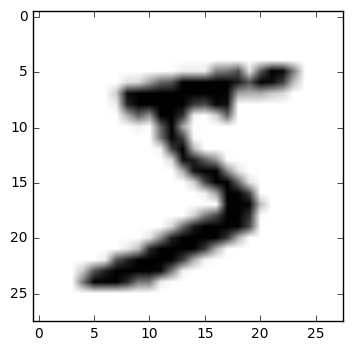

In [6]:
img=np.reshape(val_img[0], newshape=[28,28])
lab=val_lab[0]
print lab

plt.imshow(img, cmap='binary')

In [7]:
x_=tf.placeholder(tf.float32, shape=[None,28*28*1])  # 임의값 입력(row, col, color)
y_=tf.placeholder(tf.float32, shape=[None,10])

In [8]:
w1_initial=np.random.normal(size=(28*28*1,10)).astype(np.float32)   # 예측값 범위(0~9) => 10
w1=tf.Variable(w1_initial)
mean_w1 = tf.reduce_mean(w1)
b1=tf.Variable(tf.zeros([10]))   # bios => element wise (요소 관점에서 더함) 

z1=tf.matmul(x_,w1) + b1         # 행렬곱 : (1~784) * (784 * 10) => 1~10 + bios => 1~10 행렬
l1=tf.nn.relu(z1)                # 비선형화 : 직선 -> 곡선
y=tf.nn.softmax(l1)              # 확률화 

In [9]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1])) # (예측값 - 정답값) 차이 => 배치정규화
# -y_ * log(y) => -true * log(pred) 

#print cross_entropy 
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy) # 기울기 하강때 얼마만큰 뜨는가 => 0.5
correct_prediction = tf.equal(tf.arg_max(y,1) , tf.arg_max(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [10]:
zs, BNs, acc, acc_BNs = [],[],[],[]

init = tf.initialize_all_variables()  # memory 
sess = tf.Session()                   # 그래프   
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [11]:
acc, zs, acc_val, zs_val, w1_mean_list = [],[],[],[],[]
start_time = time.time()
for i in range(100000):
    
    batch_xs, batch_ys = next_batch(60, train_img, train_lab)
    sess.run(train_step, feed_dict = {x_: batch_xs, y_ :batch_ys})
    
    if i%100 is 0:
        train_res = sess.run([accuracy, z1], feed_dict ={x_: batch_xs, y_ : batch_ys})
        val_res = sess.run([accuracy, z1], feed_dict ={x_: val_img, y_ : val_lab})
        mean = sess.run(mean_w1, feed_dict ={x_: val_img, y_ : val_lab})
        
        print 'step:',i, 'training', train_res[0],'      validation', val_res[0]
        acc.append(train_res[0])
        zs.append(np.mean(train_res[1], axis=0))
        w1_mean_list.append(mean)
        print
        acc_val.append(val_res[0])
        zs_val.append(np.mean(val_res[1], axis=0))        
end_time = time.time()
zs, val_zs, acc, acc_val = np.array(zs), np.array(zs_val), np.array(acc), np.array(acc_val)

test_res = sess.run([accuracy, z1], feed_dict ={x_: test_img, y_ : test_lab} )
print 'test accuracy : ' , test_res[0]
print 'final accuracy : ' , test_res[1]
print 'The time taken by Tranining: ' .end_time - start_time

step: 0 training 0.3       validation 0.1464

step: 100 training 0.4       validation 0.4214

step: 200 training 0.533333       validation 0.5236

step: 300 training 0.75       validation 0.6494

step: 400 training 0.783333       validation 0.7084

step: 500 training 0.8       validation 0.7302

step: 600 training 0.733333       validation 0.7434

step: 700 training 0.8       validation 0.7524

step: 800 training 0.8       validation 0.7706

step: 900 training 0.883333       validation 0.778

step: 1000 training 0.733333       validation 0.7888

step: 1100 training 0.883333       validation 0.802

step: 1200 training 0.866667       validation 0.8226

step: 1300 training 0.85       validation 0.8354

step: 1400 training 0.883333       validation 0.8424



KeyboardInterrupt: 